In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfx=pd.read_csv('Training Data/Logistic_X_Train.csv')
dfy=pd.read_csv('Training Data/Logistic_Y_Train.csv')

In [3]:
dfx.head()

,f1,f2,f3
0,-1.239375,0.749101,-0.528515
1,-1.036070,0.801436,-1.283712
2,-0.615579,1.579521,-1.391927
3,1.335978,1.348651,1.433564
4,0.658925,1.300019,0.571603


In [4]:
xTrain=dfx.values
print(xTrain.shape)


yTrain=dfy.values.reshape(-1)
print(yTrain.shape)


(3000, 3)
(3000,)


c:\python 3.7\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


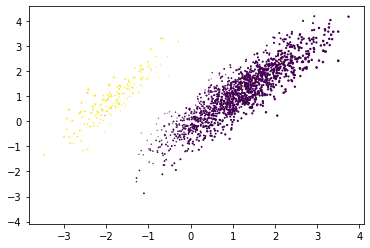

In [5]:
plt.scatter(xTrain[:,0],xTrain[:,1],xTrain[:,2],c=yTrain)
plt.show()

In [6]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)

In [7]:

def sigmoid(hx):
    return 1.0/(1.0 + np.exp(-1.0*hx))

In [8]:
def error(x,y,w,b):
    err=0.0
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        err+=y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
        
    return err/x.shape[0]

In [9]:
def get_grad(x,y,w,b):
    grad_b=0
    grad_w=np.zeros(w.shape)
    for i in range(x.shape[0]):
        hx=hypothesis(x[i],w,b)
        grad_b+=(y[i]-hx)
        grad_w+=(y[i]-hx)*x[i]
        
    return [grad_w/x.shape[0],grad_b/x.shape[0]]
    


In [10]:
def gradient_ascent(x,y,w,b,learning_rate=0.01):
    err=error(x,y,w,b)
    [grad_w,grad_b]=get_grad(x,y,w,b)
    #apply update rule
    w=w+learning_rate*grad_w
    b=b+learning_rate*grad_b
    
    return err,w,b

In [11]:
w=2*np.random.random((xTrain.shape[1],))
w

array([1.18844907, 0.28878351, 0.12030631])

In [12]:
b=5*np.random.random()
b

1.7699799486888352

In [13]:
loss=[]
weights=[]
for i in range(1000):
    l,w,b=gradient_ascent(xTrain,yTrain,w,b,learning_rate=0.1)
    loss.append(l)
    weights.append((w))

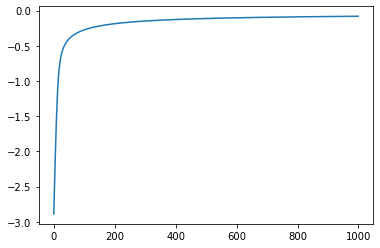

In [14]:
plt.plot(loss)
plt.show()

In [15]:
print(l)
print(w)
print(b)


-0.08147730520441122
[-2.11286642  1.40202422 -2.57453978]
-1.507041588749331


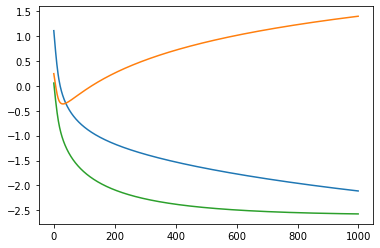

In [16]:
plt.plot(weights)
plt.show()

In [17]:
testData=pd.read_csv('Testing Data/Logistic_x_Test.csv')
xTest=testData.values
xTest.shape

(1000, 3)

In [18]:
xTestNew = np.linspace(-4,5,10)
yTest = np.dot(xTest,w)+b
yTest.shape

(1000,)

In [19]:
yPredicted = - (w[0]*xTestNew+ b) / w[1]
yPredicted

array([-4.95314132, -3.44612996, -1.93911861, -0.43210725,  1.07490411,
        2.58191546,  4.08892682,  5.59593817,  7.10294953,  8.60996089])

c:\python 3.7\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


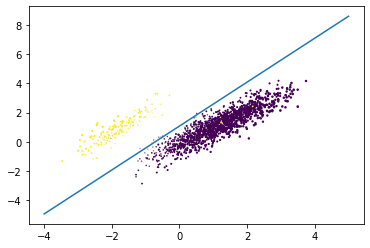

In [20]:
plt.scatter(xTrain[:,0],xTrain[:,1],xTrain[:,2],c=yTrain)
plt.plot(xTestNew,yPredicted)
plt.show()

In [21]:
print(yPredicted)
print(x.shape)
print(x[-1][2])

[-4.95314132 -3.44612996 -1.93911861 -0.43210725  1.07490411  2.58191546
  4.08892682  5.59593817  7.10294953  8.60996089]


NameError: name 'x' is not defined